# INFO BASICA

# LIBRERIAS

In [25]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math
from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

In [26]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [27]:
# Leo los indicadores

SP500 = pd.read_excel('./data/Datos Acciones renta variable.xlsx', sheet_name='Hoja3', 
                           usecols=['Date', 'SP500'])

SP500.columns = ['Date','Precio']
SP500['Date'] = pd.to_datetime(SP500['Date'], format="%Y-%m-%d")
SP500 = SP500.set_index('Date')
SP500 = SP500.loc['2015-04-30':,:]
SP500 = SP500.applymap(lambda x: x/1.1285216494845334)

In [28]:
# Procedo a calcular las medias moviles para 10, 30, 50 y 100 dias

SP500['10MM'] = SP500.Precio.rolling(window=10).mean()
SP500['30MM'] = SP500.Precio.rolling(window=30).mean()
SP500['50MM'] = SP500.Precio.rolling(window=50).mean()
SP500['100MM'] = SP500.Precio.rolling(window=100).mean()

In [29]:
# Visualizo una muestra

SP500.head(20)

,Precio,10MM,30MM,50MM,100MM
Date,,,,,
2015-04-30,1848.001765,NaN,NaN,NaN,NaN
2015-05-01,1868.187465,NaN,NaN,NaN,NaN
2015-05-04,1873.681379,NaN,NaN,NaN,NaN
2015-05-05,1851.501919,NaN,NaN,NaN,NaN
2015-05-06,1843.252188,NaN,NaN,NaN,NaN
2015-05-07,1850.208191,NaN,NaN,NaN,NaN
2015-05-08,1875.108024,NaN,NaN,NaN,NaN
2015-05-11,1865.564565,NaN,NaN,NaN,NaN
2015-05-12,1860.061791,NaN,NaN,NaN,NaN


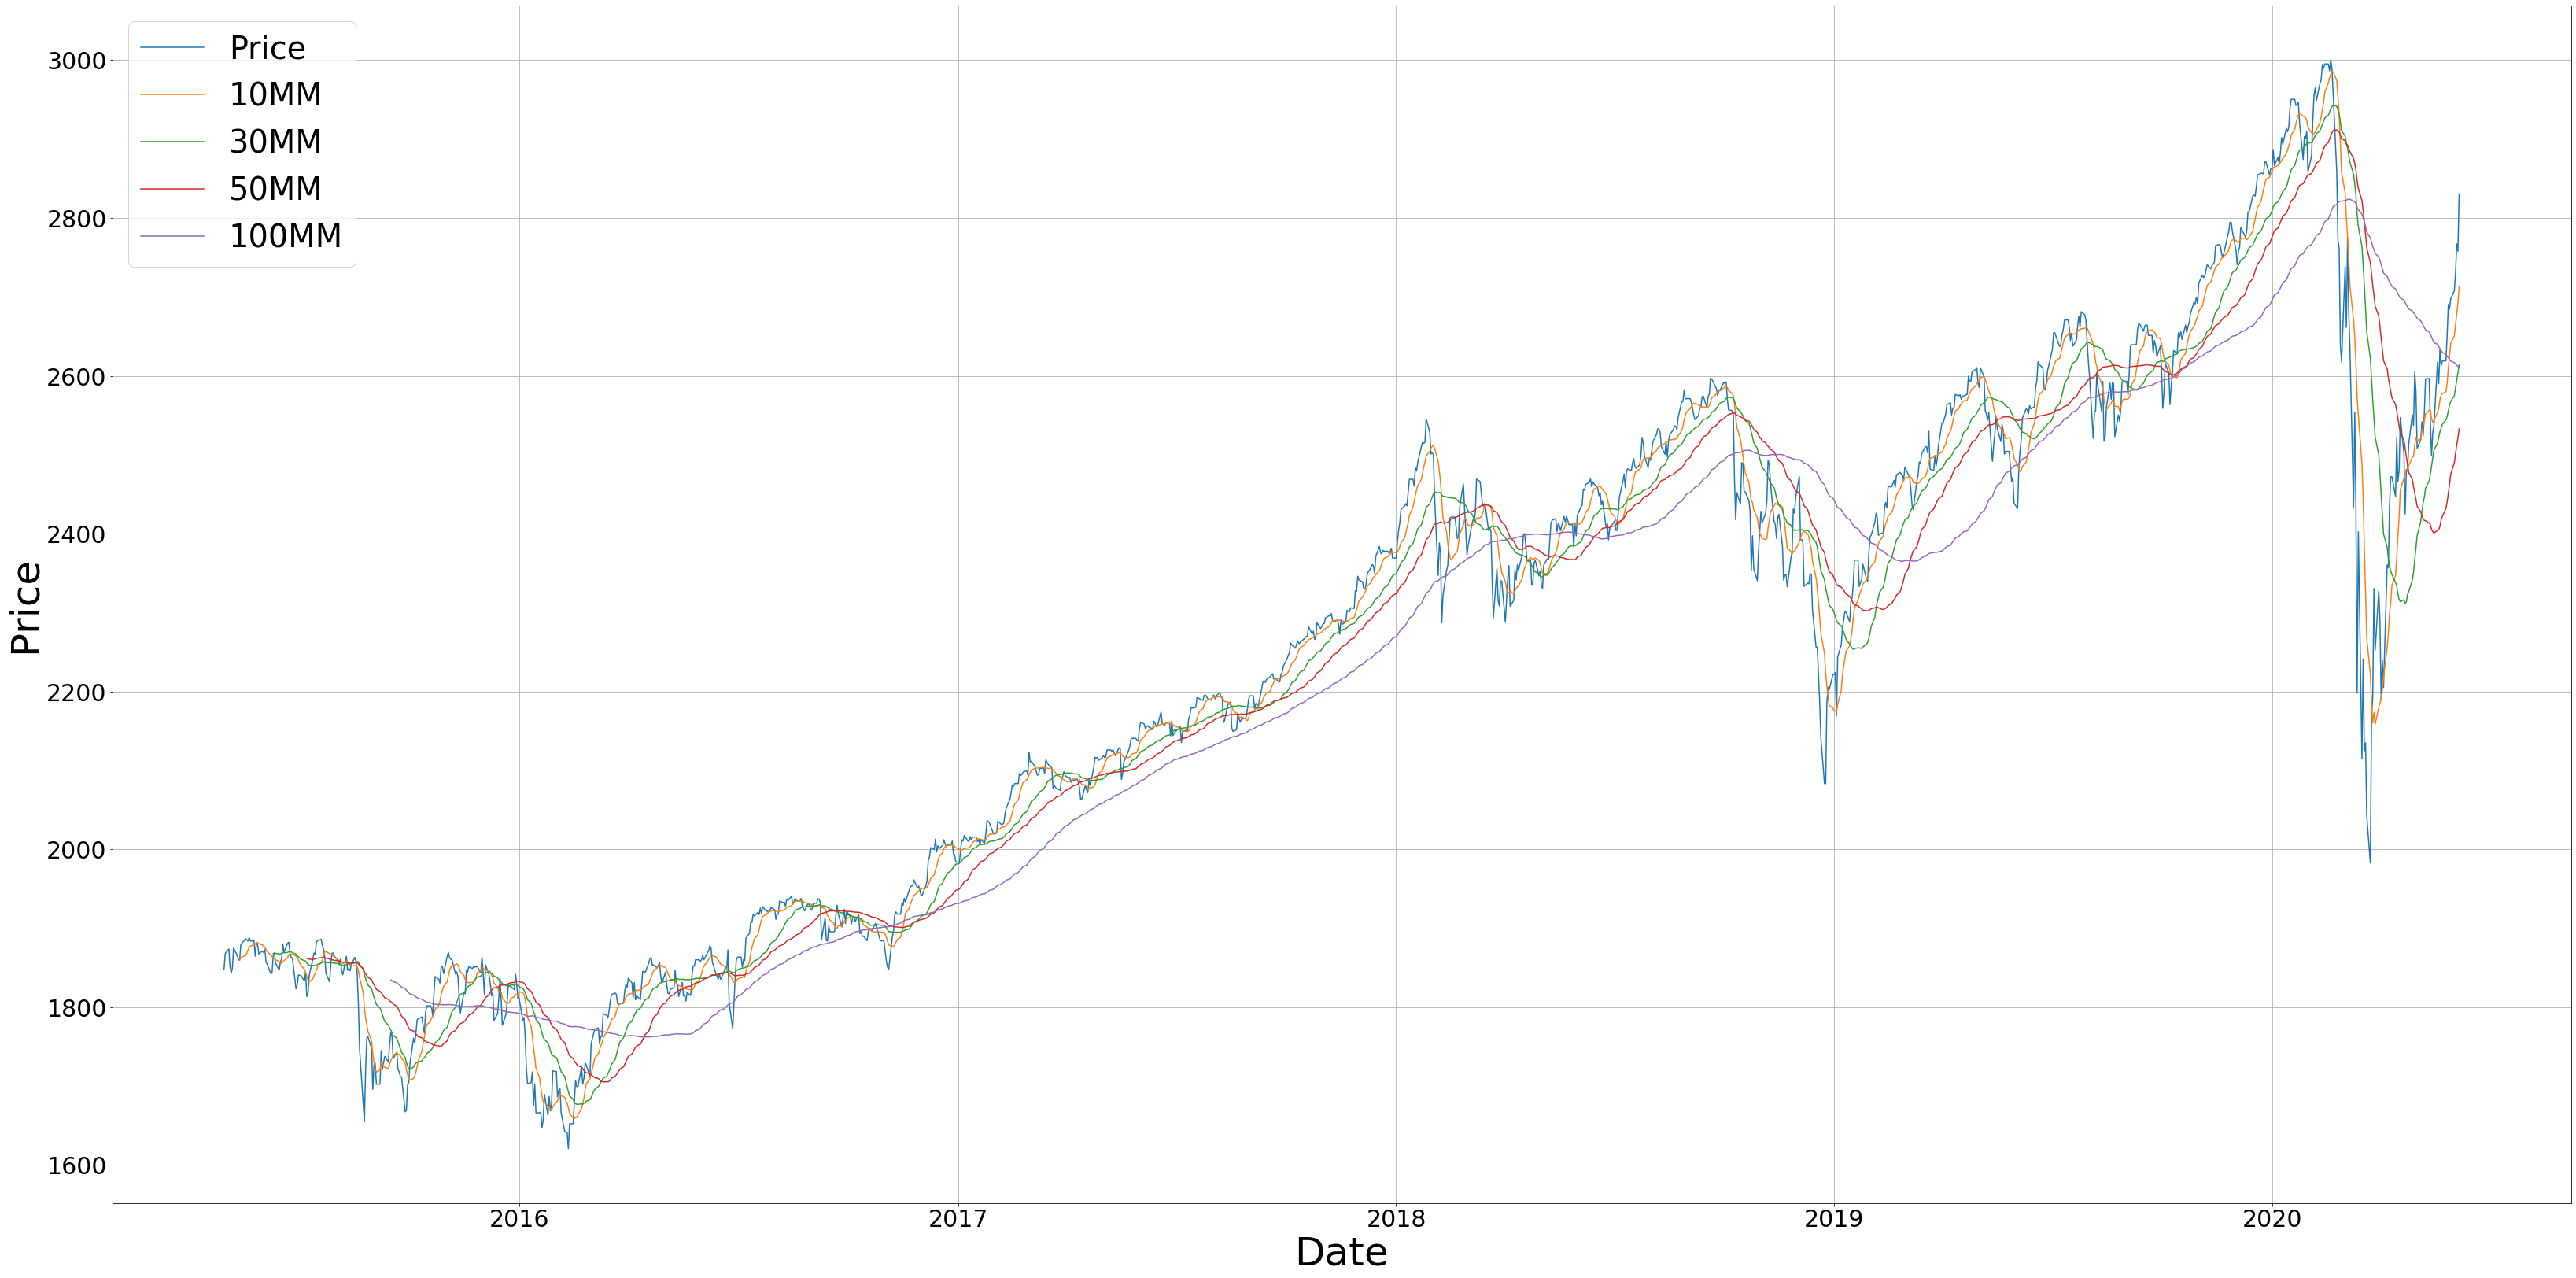

In [30]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(SP500["Precio"])
ax1 = plt.plot(SP500["10MM"])
ax1 = plt.plot(SP500["30MM"])
ax1 = plt.plot(SP500["50MM"])
ax1 = plt.plot(SP500["100MM"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Price", "10MM", "30MM", "50MM", "100MM"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [31]:
# Ahora establezco señales, serán a corto, a medio y a largo y para ello utilizaré las medias móviles

# 1 es posición larga y -1 posición corta

SP500['Señal a corto'] = np.where((np.isnan(SP500['10MM']) | np.isnan(SP500['30MM'])), 0, np.where((SP500['10MM']>SP500['30MM']), 1, -1))
SP500['Señal a medio'] = np.where((np.isnan(SP500['30MM']) | np.isnan(SP500['50MM'])), 0, np.where((SP500['30MM']>SP500['50MM']), 1, -1))
SP500['Señal a largo'] = np.where((np.isnan(SP500['50MM']) | np.isnan(SP500['100MM'])), 0, np.where((SP500['50MM']>SP500['100MM']), 1, -1))

In [32]:
# Visualizo una muestra, hay que mirar que si hay algún NaN devuelve True y no es así

SP500.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo
Date,,,,,,,,
2017-03-17,2107.403080,2102.570209,2086.818628,2059.523095,2009.379085,1,1,1
2016-08-10,1927.734396,1924.691477,1906.823558,1882.182235,1857.766753,1,1,1
2017-08-11,2163.290355,2187.161408,2177.578960,2169.243276,2138.482324,1,1,1
2015-09-10,1729.953520,1726.246901,1785.848180,1813.894311,NaN,-1,-1,0
2015-08-21,1746.435260,1837.343573,1854.325673,1852.470620,NaN,-1,1,0
2016-08-04,1917.774463,1920.994605,1889.804832,1876.394486,1853.041101,1,1,1
2015-05-22,1883.933730,1877.369389,NaN,NaN,NaN,0,0,0
2020-04-16,2480.723344,2421.926067,2316.728853,2536.135130,2700.966438,1,-1,-1
2017-08-31,2190.166224,2166.752407,2180.089915,2172.483621,2150.169916,-1,1,1


In [33]:
# Ahora determino el valor del conjunto de señales

def señalMM(corto=.9, medio=.05, largo=.05):
    SP500['Señal MM'] = corto*SP500['Señal a corto'] + medio*SP500['Señal a medio'] + largo*SP500['Señal a largo']


señalMM()

In [34]:
# Visualizo una muestra

SP500.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM
Date,,,,,,,,,
2020-04-20,2501.644520,2470.253895,2316.102370,2518.730413,2696.029625,1,-1,-1,0.8
2016-04-20,1862.968248,1837.509277,1818.836470,1778.460520,1762.533666,1,1,1,1.0
2020-04-21,2424.906958,2477.090272,2311.799690,2507.721497,2692.869385,1,-1,-1,0.8
2020-02-14,2995.210594,2959.454080,2926.461654,2891.441030,2795.257407,1,1,1,1.0
2019-12-26,2870.932960,2842.761591,2795.704452,2759.037189,2683.702436,1,1,1,1.0
2018-03-27,2315.081861,2383.093848,2407.669362,2423.967144,2390.671106,-1,-1,1,-0.9
2017-11-22,2301.311633,2289.543139,2282.091207,2262.473565,2221.154819,1,1,1,1.0
2015-05-15,1880.982966,1863.939430,NaN,NaN,NaN,0,0,0,0.0
2020-05-20,2633.188297,2569.387128,2528.930365,2409.172390,2634.875194,1,1,-1,0.9


In [35]:
# Ahora calculo las resistencia y soportes

SP500['Resistencia'] = SP500.Precio.rolling(window=100).max()
SP500['Soporte'] = SP500.Precio.rolling(window=100).min()

In [36]:
# Visualizo una muestra

SP500.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte
Date,,,,,,,,,,,
2017-01-10,2010.506401,2001.662973,1993.552067,1964.550526,1936.187401,1,1,1,1.0,2017.666211,1847.709347
2019-02-26,2475.716794,2460.916901,2403.803242,2330.769996,2364.880285,1,1,-1,0.9,2493.430234,2083.345057
2018-07-23,2487.307179,2481.508442,2449.974561,2439.064063,2405.528508,1,1,1,1.0,2494.963213,2287.842684
2018-10-16,2489.912357,2509.420179,2551.986487,2547.359017,2503.963394,-1,1,1,-0.8,2596.981636,2392.182730
2018-09-20,2596.981636,2566.773089,2550.838377,2531.474342,2478.609782,1,1,1,1.0,2596.981636,2360.096504
2019-02-04,2414.548273,2364.074275,2293.985529,2305.991029,2386.654701,1,-1,-1,0.8,2596.981636,2083.345057
2018-02-14,2391.296615,2377.266755,2445.418158,2415.608953,2349.888548,-1,1,1,-0.8,2545.693298,2224.201903
2017-06-21,2158.230638,2159.013078,2141.258286,2125.985621,2105.220667,1,1,1,1.0,2174.047792,2021.095476
2018-03-26,2355.781124,2396.623938,2409.155672,2426.870057,2390.476338,-1,-1,1,-0.9,2545.693298,2272.548339


In [37]:
# Genero la señal de resistencias y soportes

SP500['Señal R/S'] = np.where((SP500.Precio >= SP500.Resistencia), 1, 
                              np.where((SP500.Precio <= SP500.Soporte), -1, 0))

In [38]:
# Visualizo una muestra

SP500.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte,Señal R/S
Date,,,,,,,,,,,,
2018-12-13,2348.683343,2379.732813,2398.211561,2415.973678,2482.864907,-1,-1,-1,-1.0,2596.981636,2332.750994,0
2015-10-14,1767.126046,1761.746441,1735.977625,1757.721707,1807.966290,1,-1,-1,0.8,1885.900905,1654.917299,0
2019-01-04,2243.590100,2184.098995,2286.887157,2334.028418,2433.135688,-1,-1,-1,-1.0,2596.981636,2083.345057,0
2017-02-21,2095.998780,2068.958093,2036.785619,2023.446693,1972.598932,1,1,1,1.0,2095.998780,1847.709347,1
2016-10-26,1895.781088,1895.607409,1904.702198,1912.132746,1900.483168,-1,-1,1,-0.9,1940.724842,1772.708570,0
2017-12-15,2371.075470,2348.340416,2317.471417,2299.604089,2248.581497,1,1,1,1.0,2371.075470,2149.316321,1
2019-09-11,2659.169190,2617.141640,2582.402976,2612.375050,2583.265196,1,-1,1,0.9,2681.260037,2431.898406,0
2015-11-25,1850.979111,1833.480998,1834.435344,1795.869136,1801.460611,-1,1,-1,-0.9,1885.900905,1654.917299,0
2018-09-19,2576.778214,2562.103263,2548.558994,2529.126846,2475.942399,1,1,1,1.0,2582.174654,2330.243289,0


In [39]:
# Genero la señal total

def señal_total(medias=.5, RS=.5):
    SP500['Señal Total'] = medias*SP500['Señal MM'] + RS*SP500['Señal R/S']
    
señal_total()

In [40]:
# Resultado final

SP500.sample(20)

,Precio,10MM,30MM,50MM,100MM,Señal a corto,Señal a medio,Señal a largo,Señal MM,Resistencia,Soporte,Señal R/S,Señal Total
Date,,,,,,,,,,,,,
2016-10-27,1890.118812,1895.650829,1904.282180,1911.176096,1900.638770,-1,-1,1,-0.9,1940.724842,1772.708570,0,-0.45
2016-07-14,1917.331405,1880.997144,1856.956843,1848.474064,1830.130154,1,1,1,1.0,1917.331405,1712.178052,1,1.00
2017-06-28,2162.732103,2158.899655,2147.950818,2134.575089,2111.541858,1,1,1,1.0,2174.047792,2045.038304,0,0.50
2018-04-26,2363.215629,2368.021031,2353.870955,2381.492461,2399.385604,1,-1,-1,0.8,2545.693298,2287.062903,0,0.40
2017-06-29,2144.132548,2157.768972,2149.545234,2135.706835,2112.532800,1,1,1,1.0,2174.047792,2052.331031,0,0.50
2019-05-01,2590.761109,2592.559922,2556.033670,2524.127917,2420.227384,1,1,1,1.0,2610.344251,2083.345057,0,0.50
2019-05-23,2500.829294,2525.214294,2563.988915,2548.038136,2474.083064,-1,1,1,-0.8,2610.344251,2243.590100,0,-0.40
2017-04-10,2088.714914,2090.577528,2095.446139,2081.969452,2038.846309,-1,1,1,-0.8,2123.096177,1941.548929,0,-0.40
2019-06-27,2591.815586,2589.842208,2536.729949,2550.593337,2523.397758,1,-1,1,0.9,2617.743312,2399.493179,0,0.45


In [41]:
# Genero un nuevo dataframe donde ver los resultados de la estrategia

Resultados = SP500.loc[:,['Precio', 'Señal Total']]

In [42]:
# Creo la variable que muestra los resultados

Resultados['Trending Following'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Trending Following'].iloc[i] = Resultados['Trending Following'].iloc[i-1]*(1+Resultados['Señal Total'].iloc[i]*
                                                                          (Resultados.Precio.iloc[i]/Resultados.Precio.iloc[i-1]-1))

In [43]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal Total,Trending Following
Date,,,
2018-02-27,2431.747766,-0.40,142.998047
2016-08-18,1937.951302,0.50,112.479417
2015-06-15,1847.044761,-0.45,99.900448
2016-05-11,1829.349043,-0.40,107.928993
2020-03-25,2193.630934,-0.50,245.241829
2019-11-01,2717.635059,1.00,171.737979
2015-12-31,1811.165963,-0.45,100.337342
2016-07-26,1922.143010,0.50,111.121250
2020-05-05,2541.767809,0.45,232.542540


In [44]:
# Genero el Buy&Hold para hacer la comparación

Resultados['Buy&Hold'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Buy&Hold'].iloc[i] = Resultados['Buy&Hold'].iloc[i-1]*(1+(Resultados.Precio.iloc[i]/
                                                                         Resultados.Precio.iloc[i-1]-1))

In [45]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal Total,Trending Following,Buy&Hold
Date,,,,
2019-11-14,2743.970398,1.000,173.479148,148.483105
2019-02-21,2458.862886,0.450,165.893054,133.055224
2019-05-31,2438.641741,-0.400,177.697935,131.961007
2018-06-06,2456.621015,0.450,142.597062,132.933911
2018-10-04,2571.160244,0.500,147.014116,139.131915
2015-12-04,1853.477956,0.500,100.743142,100.296330
2019-08-09,2586.259644,-0.400,174.305297,139.948981
2018-11-02,2412.944405,-0.450,152.492750,130.570460
2017-03-09,2095.546861,0.500,122.999908,113.395285


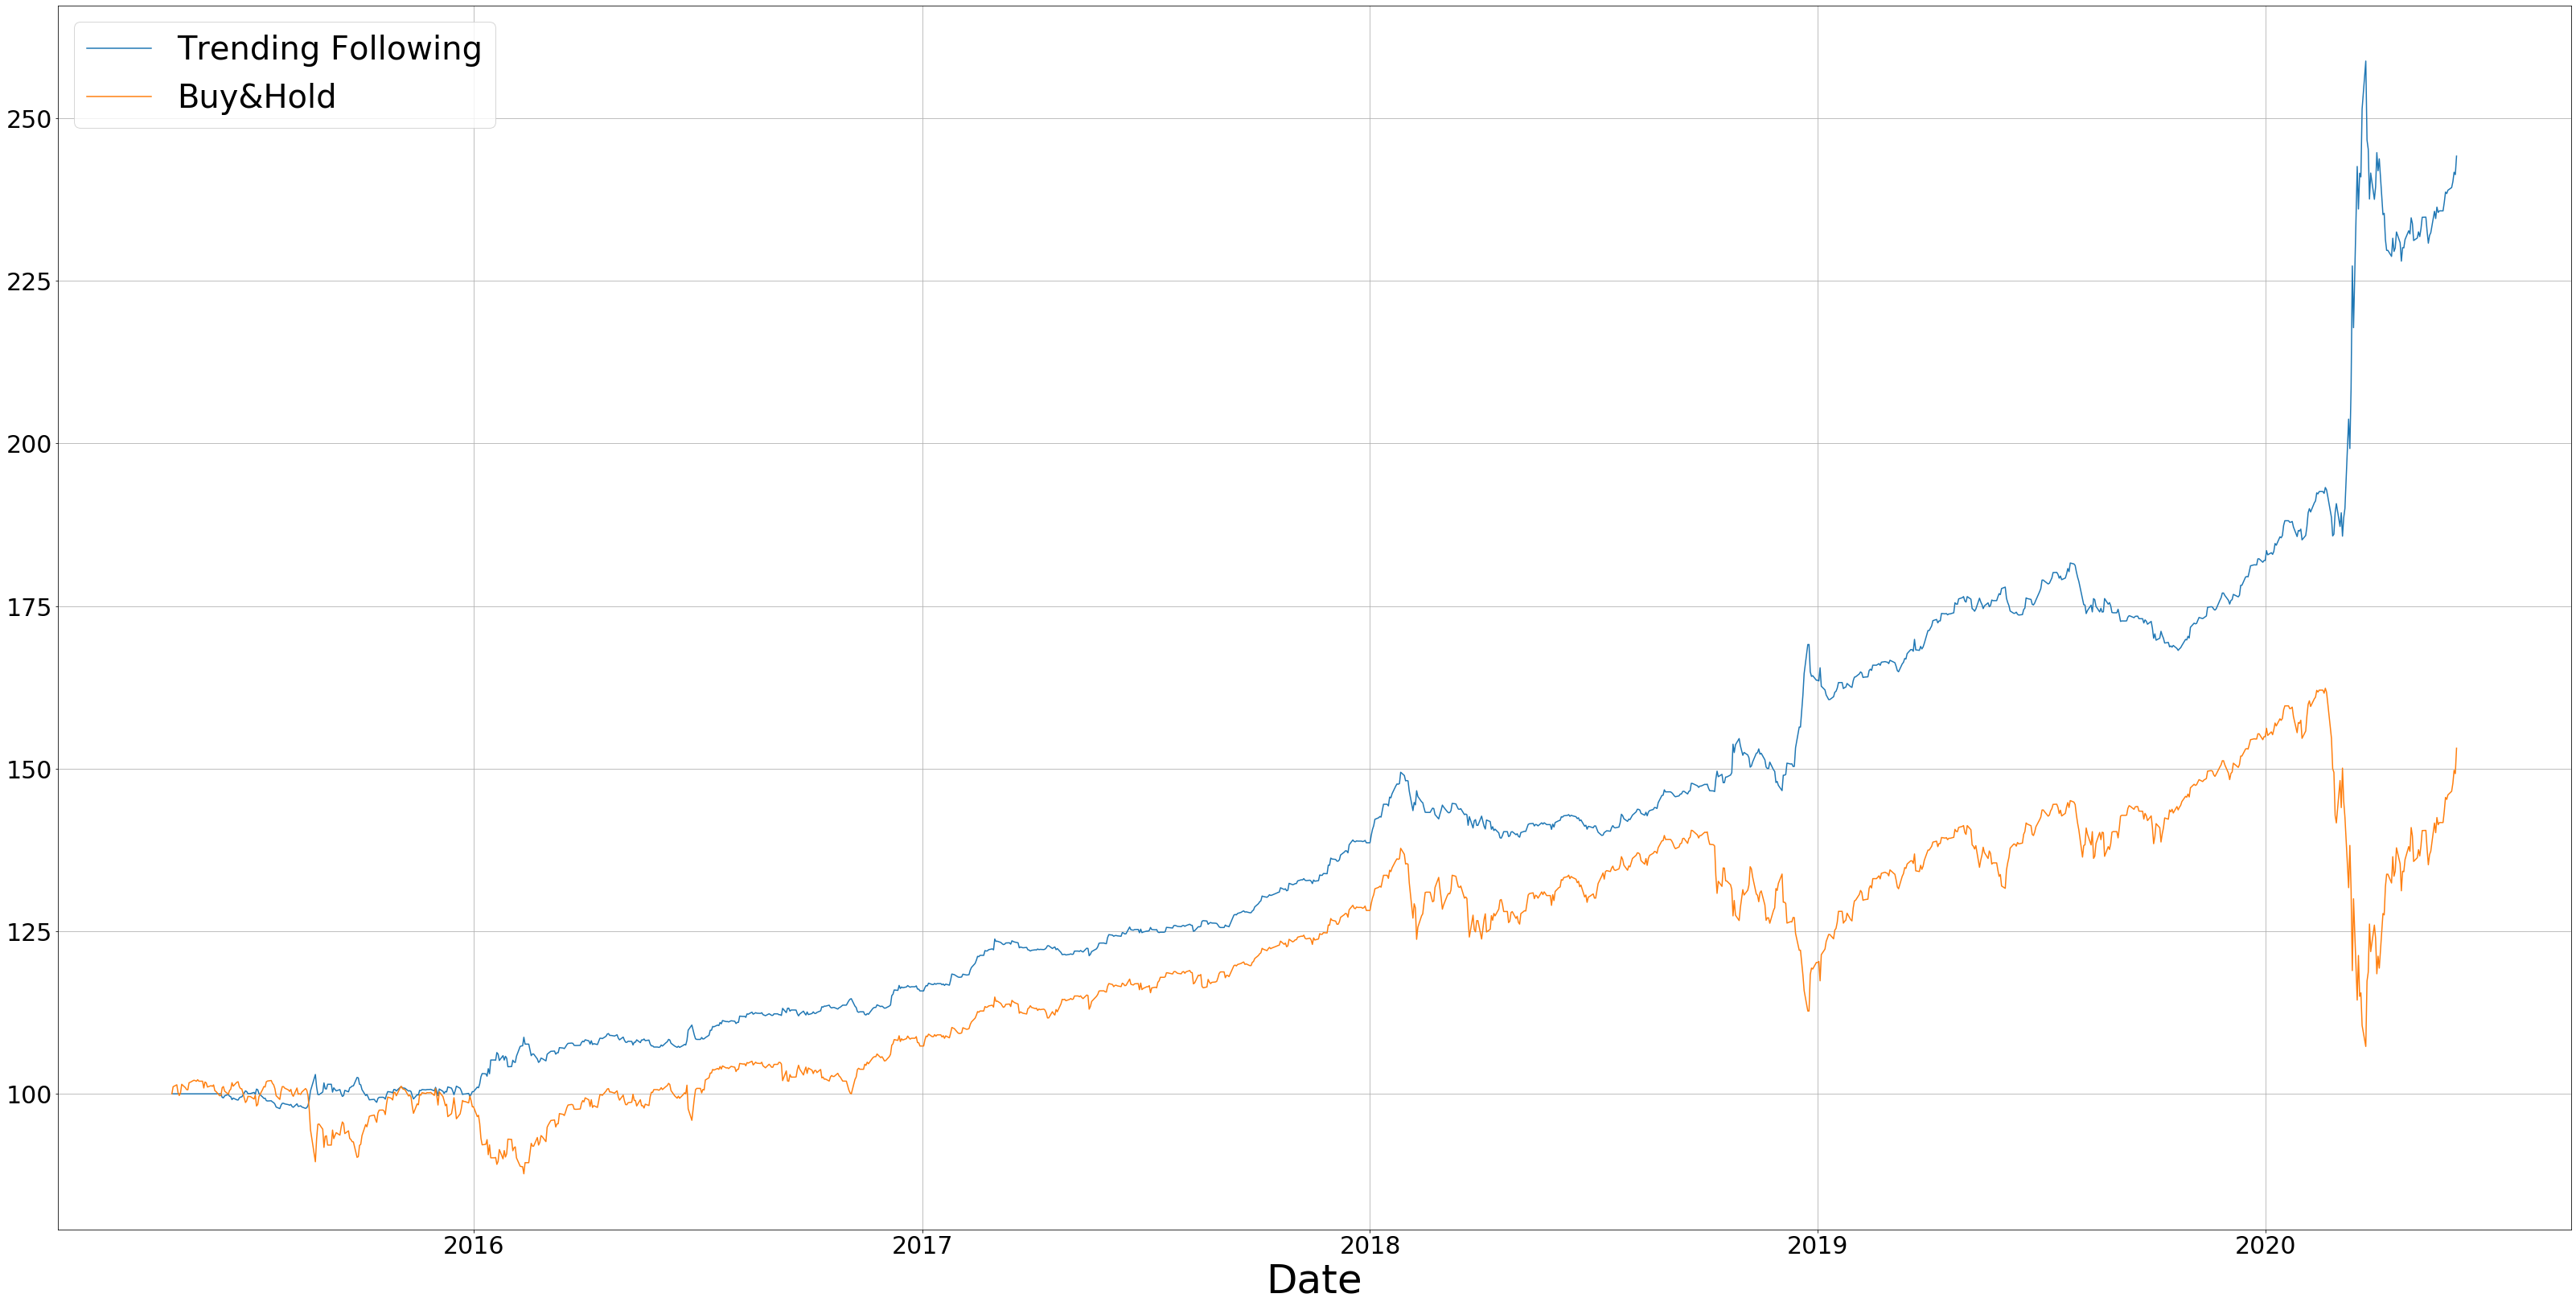

In [46]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Resultados["Trending Following"])
ax1 = plt.plot(Resultados["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Trending Following", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [47]:
SP500_medias = pd.DataFrame(Resultados.loc[:, 'Trending Following'])
SP500_medias.columns = ['TF SP500']
SP500_medias

,TF SP500
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [48]:
SP500_medias.to_csv('./data_resultante/TFSP500.csv')